# 시작

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import random

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')

In [ ]:
tra = train
tes = test

In [ ]:
data=pd.concat([tra, tes], axis=0)
data.shape

(36457, 20)

In [ ]:
data_raw = data

In [ ]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,1,0,0,1,1,0,2,-13899,-4709,1,0,0,0,0,2.0,-6.0,1.0
1,1,0,0,0,1,0,1,0,2,0,-11380,-1540,1,0,0,1,1,3.0,-5.0,1.0
2,2,1,1,0,0,1,0,1,0,0,-19087,-4434,1,0,1,0,4,2.0,-22.0,2.0
3,3,0,0,0,0,0,1,0,0,0,-15088,-2092,1,0,1,0,3,2.0,-37.0,0.0
4,4,0,1,0,0,0,3,1,0,0,-15037,-2105,1,0,0,0,4,2.0,-26.0,2.0


In [ ]:
#dd = data.loc[data['DAYS_EMPLOYED'] < 1] #정상값들만 뽑는 것
#dd['DAYS_EMPLOYED'].mean()

-2645.5036936877514

In [ ]:
data.loc[data['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0  #365243값을 정상값들의 평균으로 대체하는것
data



,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


In [ ]:
data['DAYS_BIRTH']

index
0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
36452   -18593
36453   -10886
36454   -21016
36455   -16541
36456    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [ ]:
data['begin_month']

index
0        -6.0
1        -5.0
2       -22.0
3       -37.0
4       -26.0
         ... 
36452   -19.0
36453   -34.0
36454   -55.0
36455   -33.0
36456   -11.0
Name: begin_month, Length: 36457, dtype: float64

In [ ]:
# 나이 변환
def days_to_age(x):
    return (x*-1)/365
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(days_to_age)

In [ ]:
# 마이너스 값 변환
def minus(x):
    return x * -1
data['begin_month'] = data['begin_month'].apply(minus)

In [ ]:
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(days_to_age)

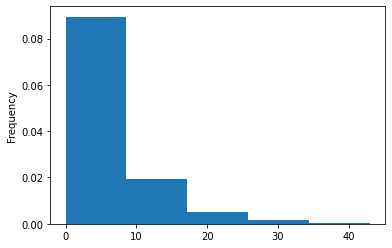

In [ ]:
data['DAYS_EMPLOYED'].plot(kind='hist',bins= 5,density=True)  #50 구간으로 나눠서 plot그리는거거거

In [ ]:
# 범주형 자료로 바꿔주는 함수
def make_bin(array, n):
    array = array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [ ]:
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 5)

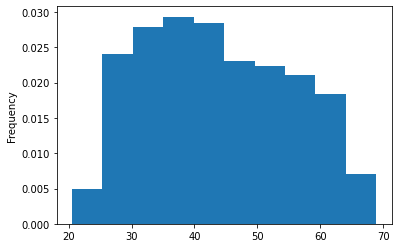

In [ ]:
data['DAYS_BIRTH'].plot(kind='hist',bins=10,density=True)  #50 구간으로 나눠서 plot그리는거거거

In [ ]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)

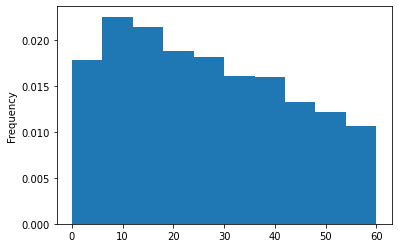

In [ ]:
data['begin_month'].plot(kind='hist',bins=10,density=True)  #50 구간으로 나눠서 plot그리는거거거

In [ ]:
data['begin_month'] = make_bin(data['begin_month'], 10)


In [ ]:
data.loc[data['child_num'] >= 2, 'child_num']=2

In [ ]:
data=data.drop(['index', 'FLAG_MOBIL','DAYS_EMPLOYED','DAYS_BIRTH'], axis=1)

In [ ]:
data=data.drop(['begin_month'],axis=1)
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,credit
0,0,0,1,0,0,1,1,0,2,0,0,0,0,2.0,1.0
1,0,0,0,1,0,1,0,2,0,0,0,1,1,3.0,1.0
2,1,1,0,0,1,0,1,0,0,0,1,0,4,2.0,2.0
3,0,0,0,0,0,1,0,0,0,0,1,0,3,2.0,0.0
4,0,1,0,0,0,3,1,0,0,0,0,0,4,2.0,2.0


In [ ]:
data = data.astype({'DAYS_BIRTH': 'int'})
data = data.astype({'DAYS_EMPLOYED': 'int'})
data = data.astype({'begin_month': 'int'})



(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: income_total, dtype: int64


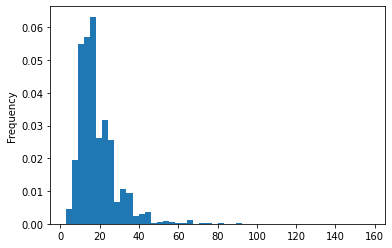

In [ ]:
data['income_total'] = data['income_total'].astype(object)
data['income_total'] = data['income_total']/10000 
print(data['income_total'].value_counts(bins=10,sort=False)) #10 구간으로 나눠서 counts하는거
data['income_total'].plot(kind='hist',bins=50,density=True)  #50 구간으로 나눠서 plot그리는거거거

In [ ]:
count, bin_dividers =np.histogram(data['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
data['income_total']=pd.cut(x=data['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

##one hot encoding 찌껄인거

In [ ]:
data3 = data.drop(['gender','car','reality','income_type','edu_type','family_type','house_type'],axis=1)

In [ ]:
print(data3.shape)
print(data2.shape)

(36457, 9)
(36457, 22)


In [ ]:
data3

,child_num,income_total,DAYS_BIRTH,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,2.0,0,1.0
1,1,0,1,0,0,1,3.0,0,1.0
2,0,1,2,0,1,0,2.0,1,2.0
3,0,0,3,0,1,0,2.0,2,0.0
4,0,0,3,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...
9995,0,0,2,1,1,0,2.0,1,NaN
9996,0,0,5,1,0,0,2.0,2,NaN
9997,0,1,8,0,0,0,2.0,3,NaN
9998,0,0,4,0,1,0,2.0,2,NaN


In [ ]:
data2

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
36454,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
36455,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
 data2 = data2.reset_index(drop=True)
 data3 = data3.reset_index(drop=True)

In [ ]:
final = pd.concat([data2,data3],axis=1)
final



,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,child_num,income_total,DAYS_BIRTH,work_phone,phone,email,family_size,begin_month,credit
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,2.0,0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,3.0,0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,0,1,0,2.0,1,2.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,3,0,1,0,2.0,2,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,3,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,2,1,1,0,2.0,1,NaN
36453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,5,1,0,0,2.0,2,NaN
36454,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,8,0,0,0,2.0,3,NaN
36455,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,4,0,1,0,2.0,2,NaN


In [ ]:
final = pd.merge(data2,data3, how="outer", left_index=True, right_index = True)
final

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,child_num,income_total,DAYS_BIRTH,work_phone,phone,email,family_size,begin_month,credit
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,6.0,0.0,1.0,0.0,2.0,3.0,NaN
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,1.0,3.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,1.0,0.0,2.0,2.0,NaN
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0.0,1.0,0.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36454,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36455,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#One-hot encoding
# 3 ONE-HOT
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
target_col = ['gender','car','reality','income_type','edu_type','house_type']
encoder.fit(data.loc[:,target_col])
data2 = pd.DataFrame(encoder.transform(data[target_col]).toarray(), 
             columns=encoder.get_feature_names(target_col))

In [ ]:
data2.head(15)
#data.loc[:,target_col]

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


##다시 05/07 이후 다시다시다시

In [4]:
train.loc[train['child_num'] >= 2, 'child_num']=2
test.loc[test['child_num'] >= 2, 'child_num']=2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         36457 non-null  object 
 1   car            36457 non-null  object 
 2   reality        36457 non-null  object 
 3   child_num      36457 non-null  int64  
 4   income_total   36457 non-null  int64  
 5   income_type    36457 non-null  int64  
 6   edu_type       36457 non-null  int64  
 7   family_type    36457 non-null  int64  
 8   house_type     36457 non-null  int64  
 9   DAYS_BIRTH     36457 non-null  int64  
 10  DAYS_EMPLOYED  36457 non-null  int64  
 11  work_phone     36457 non-null  int64  
 12  phone          36457 non-null  int64  
 13  email          36457 non-null  int64  
 14  occyp_type     25134 non-null  object 
 15  family_size    36457 non-null  float64
 16  begin_month    36457 non-null  int64  
 17  credit         26457 non-null  float64
dtypes: floa

In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
train['family_type']=label_encoder.fit_transform(train['family_type'])
train['house_type']=label_encoder.fit_transform(train['house_type'])
train['income_total']=label_encoder.fit_transform(train['income_total'])
train['child_num']=label_encoder.fit_transform(train['child_num'])
#data['occyp_type']=label_encoder.fit_transform(data['occyp_type'])

In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
test['income_type']=label_encoder.fit_transform(test['income_type'])
test['edu_type']=label_encoder.fit_transform(test['edu_type'])
test['family_type']=label_encoder.fit_transform(test['family_type'])
test['house_type']=label_encoder.fit_transform(test['house_type'])
test['income_total']=label_encoder.fit_transform(test['income_total'])
test['child_num']=label_encoder.fit_transform(test['child_num'])
#data['occyp_type']=label_encoder.fit_transform(data['occyp_type'])

In [7]:
#train 3개만
train.loc[train['gender']=='F','gender'] = 2
train.loc[train['gender']=='M','gender'] = 1

train.loc[train['car']=='N','car'] = 1
train.loc[train['car']=='Y','car'] = 2

train.loc[train['reality']=='N','reality'] = 1
train.loc[train['reality']=='Y','reality'] = 2

In [8]:
#test 3개만
test.loc[test['gender']=='F','gender'] = 2
test.loc[test['gender']=='M','gender'] = 1

test.loc[test['car']=='N','car'] = 1
test.loc[test['car']=='Y','car'] = 2

test.loc[test['reality']=='N','reality'] = 1
test.loc[test['reality']=='Y','reality'] = 2

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  int64  
 2   car            26457 non-null  int64  
 3   reality        26457 non-null  int64  
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  int64  
 6   income_type    26457 non-null  int64  
 7   edu_type       26457 non-null  int64  
 8   family_type    26457 non-null  int64  
 9   house_type     26457 non-null  int64  
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [12]:
train = train.astype({'gender': 'int'})
train = train.astype({'car': 'int'})
train = train.astype({'reality': 'int'})

test = test.astype({'gender': 'int'})
test = test.astype({'car': 'int'})
test = test.astype({'reality': 'int'})

In [14]:
train = train.drop(['occyp_type','index'], axis = 1)
test = test.drop(['occyp_type','index'], axis= 1)

In [ ]:
################## 최정명님 LGBM 베이스라인

In [60]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7, shuffle=True)
folds=[]
for train_idx, valid_idx in skf.split(train, train['credit']):
    folds.append((train_idx, valid_idx))

In [63]:
from lightgbm import LGBMClassifier
lgb_models={}
for fold in range(7):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = train.drop(['credit'],axis=1).iloc[train_idx].values, train.drop(['credit'],axis=1).iloc[valid_idx].values,\
                                         train['credit'][train_idx].values, train['credit'][valid_idx].values 
    lgb = LGBMClassifier(learning_rate = 0.1, max_depth= -1, n_estimators=1000, metric = 'multi_logloss')
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=40,
           verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')


====================================1============================================
Training until validation scores don't improve for 40 rounds.
[100]	training's multi_logloss: 0.683818	valid_1's multi_logloss: 0.767104
[200]	training's multi_logloss: 0.61534	valid_1's multi_logloss: 0.754056
[300]	training's multi_logloss: 0.560888	valid_1's multi_logloss: 0.744993
[400]	training's multi_logloss: 0.516058	valid_1's multi_logloss: 0.742743
Early stopping, best iteration is:
[367]	training's multi_logloss: 0.529821	valid_1's multi_logloss: 0.7421


====================================2============================================
Training until validation scores don't improve for 40 rounds.
[100]	training's multi_logloss: 0.681499	valid_1's multi_logloss: 0.779577
[200]	training's multi_logloss: 0.613731	valid_1's multi_logloss: 0.769447
[300]	training's multi_logloss: 0.558456	valid_1's multi_logloss: 0.761039
[400]	training's multi_logloss: 0.513839	valid_1's multi_logloss: 0.757449
Ear

In [64]:
submission.iloc[:,1:]=0
for fold in range(7):
  submission.iloc[:,1:] += lgb_models[fold].predict_proba(test)/7

In [65]:
submission.head(20)

,index,0,1,2
0,26457,0.040063,0.051990,0.907947
1,26458,0.095327,0.097596,0.807076
2,26459,0.047377,0.056353,0.896269
3,26460,0.120973,0.111442,0.767585
4,26461,0.335894,0.178782,0.485324
5,26462,0.091352,0.206992,0.701656
6,26463,0.233560,0.766307,0.000132
7,26464,0.120455,0.165970,0.713574
8,26465,0.074628,0.129009,0.796363
9,26466,0.067545,0.266802,0.665653


In [66]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/ㅊㅈㅁlgbm_v3.csv', index=False)

In [ ]:
data.loc[data['income_type']=='Commercial associate','income_type'] = 2
data.loc[data['income_type']=='Working','income_type'] = 3
data.loc[data['income_type']=='State servant','income_type'] = 5
data.loc[data['income_type']=='Pensioner','income_type'] = 4
data.loc[data['income_type']=='Student','income_type'] = 1

In [ ]:
data.loc[data['edu_type']=='Higher education','edu_type'] = 4
data.loc[data['edu_type']=='Secondary / secondary special','edu_type'] = 2
data.loc[data['edu_type']=='Incomplete higher','edu_type'] = 3
data.loc[data['edu_type']=='Lower secondary','edu_type'] = 1
data.loc[data['edu_type']=='Academic degree','edu_type'] = 5

In [ ]:
data.loc[data['family_type']=='Married','family_type'] = 4
data.loc[data['family_type']=='Civil marriage','family_type'] = 5
data.loc[data['family_type']=='Separated','family_type'] = 1
data.loc[data['family_type']=='Single / not married','family_type'] = 3
data.loc[data['family_type']=='Widow','family_type'] = 2

In [ ]:
data.loc[data['house_type']=='Municipal apartment','house_type'] = 4
data.loc[data['house_type']=='House / apartment','house_type'] = 6
data.loc[data['house_type']=='With parents','house_type'] = 5
data.loc[data['house_type']=='Co-op apartment','house_type'] = 2
data.loc[data['house_type']=='Rented apartment','house_type'] = 3
data.loc[data['house_type']=='Office apartment','house_type'] = 1

In [ ]:
data = data.astype({'income_type': 'int'})
data = data.astype({'edu_type': 'int'})
data = data.astype({'family_type': 'int'})
data = data.astype({'house_type': 'int'})
data = data.astype({'gender': 'int'})
data = data.astype({'car': 'int'})
data = data.astype({'reality': 'int'})

In [ ]:
print(data['income_type'].unique())
print(data['edu_type'].unique())
print(data['family_type'].unique())
print(data['house_type'].unique())

[0 4 2 1 3]
[1 4 2 3 0]
[1 0 2 3 4]
[2 1 5 0 4 3]


In [ ]:
data=data.drop(['occyp_type'], axis=1)

In [ ]:
data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,2,1,1,0,0,0,1,1,2,0,0,0,0,0,2.0,0,1.0
1,2,1,2,1,0,0,4,0,1,1,1,0,0,1,3.0,0,1.0
2,1,2,2,0,1,4,1,1,1,2,0,0,1,0,2.0,1,2.0
3,2,1,2,0,0,0,4,1,1,3,1,0,1,0,2.0,2,0.0
4,2,2,2,0,0,2,1,1,1,3,1,0,0,0,2.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2,2,0,0,4,2,1,1,2,0,1,1,0,2.0,1,NaN
9996,1,2,2,0,0,4,4,0,1,5,1,1,0,0,2.0,8,NaN
9997,2,1,2,0,1,4,4,1,1,8,4,0,0,0,2.0,6,NaN
9998,2,2,1,0,0,0,4,1,1,4,1,0,1,0,2.0,8,NaN


## train test 나누기

In [ ]:
train=data[:len(data)-10000]
test=data[len(data)-10000:]

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,1,0,0,1,1,0,2,0,0,0,0,2.0,-6.0,1.0
1,0,0,0,1,0,1,0,2,0,0,0,1,1,3.0,-5.0,1.0
2,1,1,0,0,1,0,1,0,0,0,1,0,4,2.0,-22.0,2.0
3,0,0,0,0,0,1,0,0,0,0,1,0,3,2.0,-37.0,0.0
4,0,1,0,0,0,3,1,0,0,0,0,0,4,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,1,2,0,3,0,0,0,0,0,0,2,4.0,-2.0,1.0
26453,0,0,0,1,0,0,1,3,0,0,0,0,0,2.0,-47.0,2.0
26454,0,1,1,0,1,0,0,2,1,0,0,0,2,2.0,-25.0,2.0
26455,1,0,0,0,0,0,2,1,0,0,0,0,1,1.0,-59.0,2.0


In [ ]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,1,1,0,0,2,0,2,0,0,1,0,0,2.0,-60.0,NaN
1,0,0,0,0,0,3,1,0,0,0,1,0,2,2.0,-36.0,NaN
2,0,0,0,0,0,0,0,0,0,1,1,0,1,2.0,-40.0,NaN
3,1,1,1,0,0,1,0,0,0,1,0,0,5,2.0,-41.0,NaN
4,0,1,0,0,0,3,1,0,0,1,0,0,4,2.0,-8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,2,0,0,1,1,0,7,2.0,-19.0,NaN
9996,1,1,0,0,0,0,0,2,0,1,0,0,1,2.0,-34.0,NaN
9997,0,0,0,0,1,0,0,0,0,0,0,0,8,2.0,-55.0,NaN
9998,0,1,1,0,0,1,0,0,0,0,1,0,0,2.0,-33.0,NaN


In [ ]:
tx = train.drop('credit',axis=1)
tx

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,1,0,0,1,1,0,2,0,0,0,0,2.0,-6.0
1,0,0,0,1,0,1,0,2,0,0,0,1,1,3.0,-5.0
2,1,1,0,0,1,0,1,0,0,0,1,0,4,2.0,-22.0
3,0,0,0,0,0,1,0,0,0,0,1,0,3,2.0,-37.0
4,0,1,0,0,0,3,1,0,0,0,0,0,4,2.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,1,2,0,3,0,0,0,0,0,0,2,4.0,-2.0
26453,0,0,0,1,0,0,1,3,0,0,0,0,0,2.0,-47.0
26454,0,1,1,0,1,0,0,2,1,0,0,0,2,2.0,-25.0
26455,1,0,0,0,0,0,2,1,0,0,0,0,1,1.0,-59.0


In [ ]:
ty = train['credit']
ty

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

In [ ]:
tesy = test['credit']

In [ ]:
tesx = test.drop('credit',axis=1)
tesx

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,1,0,0,2,0,2,0,0,1,0,0,2.0,-60.0
1,0,0,0,0,0,3,1,0,0,0,1,0,2,2.0,-36.0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,2.0,-40.0
3,1,1,1,0,0,1,0,0,0,1,0,0,5,2.0,-41.0
4,0,1,0,0,0,3,1,0,0,1,0,0,4,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,2,0,0,1,1,0,7,2.0,-19.0
9996,1,1,0,0,0,0,0,2,0,1,0,0,1,2.0,-34.0
9997,0,0,0,0,1,0,0,0,0,0,0,0,8,2.0,-55.0
9998,0,1,1,0,0,1,0,0,0,0,1,0,0,2.0,-33.0


In [ ]:
tesx.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,1,0,0,2,0,2,0,0,1,0,0,2.0,-60.0
1,0,0,0,0,0,3,1,0,0,0,1,0,2,2.0,-36.0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,2.0,-40.0
3,1,1,1,0,0,1,0,0,0,1,0,0,5,2.0,-41.0
4,0,1,0,0,0,3,1,0,0,1,0,0,4,2.0,-8.0


# svm

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#import mglearn
%matplotlib inline


In [ ]:
x = tx 
y = ty

In [ ]:
trainX, testX, trainY, testY = \
    train_test_split(x, y, test_size=0.2)

In [ ]:
svm = SVC(kernel='rbf', probability = True)
svm.fit(tx, ty)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.predict_proba(tesx)

array([[0.12288476, 0.22456212, 0.65255312],
       [0.1276617 , 0.21357232, 0.65876598],
       [0.12044342, 0.22926369, 0.65029289],
       ...,
       [0.09519754, 0.22860616, 0.6761963 ],
       [0.11319092, 0.23860258, 0.64820649],
       [0.09731502, 0.23985152, 0.66283346]])

In [ ]:
svm.predict_proba(tesy)

ValueError: ignored

In [ ]:
submission.iloc[:,1:] = svm.predict_proba(tesx)
submission

,index,0,1,2
0,26457,0.122885,0.224562,0.652553
1,26458,0.127662,0.213572,0.658766
2,26459,0.120443,0.229264,0.650293
3,26460,0.134527,0.212840,0.652633
4,26461,0.080346,0.216851,0.702802
...,...,...,...,...
9995,36452,0.130271,0.240551,0.629178
9996,36453,0.117413,0.231505,0.651082
9997,36454,0.095198,0.228606,0.676196
9998,36455,0.113191,0.238603,0.648206


In [ ]:
#submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/svm_v2.csv', index=False)

submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/svm_v5.csv', index=False)
#v5는 one-hot encoding 한거

##svm_v2

In [ ]:
svm_model = SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)


In [ ]:
svm_model.fit(tx, ty)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_model.predict_proba(tesx)

array([[0.12326   , 0.22418651, 0.6525535 ],
       [0.13022997, 0.22131694, 0.64845309],
       [0.12502108, 0.22810813, 0.64687079],
       ...,
       [0.09633393, 0.23359649, 0.67006958],
       [0.11247246, 0.23732771, 0.65019983],
       [0.09706872, 0.24543335, 0.65749793]])

In [ ]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submission.iloc[:,1:] = svm_model.predict_proba(tesx)
submission

,index,0,1,2
0,26457,0.123260,0.224187,0.652553
1,26458,0.130230,0.221317,0.648453
2,26459,0.125021,0.228108,0.646871
3,26460,0.140575,0.210587,0.648838
4,26461,0.115117,0.237341,0.647542
...,...,...,...,...
9995,36452,0.122928,0.230197,0.646874
9996,36453,0.117145,0.232201,0.650654
9997,36454,0.096334,0.233596,0.670070
9998,36455,0.112472,0.237328,0.650200


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/svm_.csv', index=False)

#StratifiedKFold

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='rbf', C=20, probability = True).fit(tx,ty)
scores=cross_val_score(model, tx, ty, cv=5)
print("CV 점수 : " +str(scores))
st_scores=cross_val_score(model, tx, ty,cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : " +str(st_scores))
print()
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " +str(st_scores.mean()))

CV 점수 : [0.67894936 0.67195767 0.66849367 0.67680968 0.67057267]
StratifiedKFold CV 점수 : [0.67309146 0.67781557 0.67454167 0.67208467 0.66981667]

CV 평균점수 : 0.6733566090708949
StratifiedKFold CV 평균점수 : 0.6734700091842949


In [ ]:
model.predict_proba(tesx)

array([[0.11104996, 0.19514464, 0.69380539],
       [0.13331124, 0.18985104, 0.67683772],
       [0.11833542, 0.15685532, 0.72480926],
       ...,
       [0.10874898, 0.21130077, 0.67995026],
       [0.1156148 , 0.20723321, 0.67715199],
       [0.10463712, 0.1965895 , 0.69877338]])

In [ ]:
submission.iloc[:,1:] = model.predict_proba(tesx)
submission

,index,0,1,2
0,26457,0.111050,0.195145,0.693805
1,26458,0.133311,0.189851,0.676838
2,26459,0.118335,0.156855,0.724809
3,26460,0.129756,0.147657,0.722586
4,26461,0.110952,0.200644,0.688404
...,...,...,...,...
9995,36452,0.129577,0.217640,0.652783
9996,36453,0.114873,0.214928,0.670199
9997,36454,0.108749,0.211301,0.679950
9998,36455,0.115615,0.207233,0.677152


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/svm_v3.csv', index=False)

# Gridsearch

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n{}".format(param_grid))

매개변수 그리드:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [ ]:
grid_search = GridSearchCV(SVC(kernel= 'rbf', probability=True), param_grid, cv=5, return_train_score=True)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(tx, ty,random_state=0)

In [ ]:
grid_search.fit(tx, ty)

In [ ]:
print('최적 하이퍼파라미터: ', grid_search.best_params_)

NameError: ignored

In [ ]:
svm = SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)



#C=1.0, break_ties=False, cache_size=200,
 #                          class_weight=None, coef0=0.0,
  #                         decision_function_shape='ovr', degree=3,
   #                        gamma='scale', kernel='rbf', max_iter=-1,
    #                       probability=True, random_state=None, shrinking=True,
     #                      tol=0.001, verbose=False

In [ ]:
svm.fit(tx, ty)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.predict_proba(tesx)

array([[0.10934609, 0.20350758, 0.68714633],
       [0.13112687, 0.1889289 , 0.67994422],
       [0.11816527, 0.18052703, 0.7013077 ],
       ...,
       [0.10344179, 0.20608234, 0.69047587],
       [0.1154042 , 0.19596473, 0.68863107],
       [0.1040694 , 0.19656769, 0.69936291]])

In [ ]:
submission.iloc[:,1:] = svm.predict_proba(tesx)
submission

,index,0,1,2
0,26457,0.109346,0.203508,0.687146
1,26458,0.131127,0.188929,0.679944
2,26459,0.118165,0.180527,0.701308
3,26460,0.123139,0.153331,0.723530
4,26461,0.108307,0.200539,0.691155
...,...,...,...,...
9995,36452,0.131300,0.228016,0.640683
9996,36453,0.116654,0.199865,0.683481
9997,36454,0.103442,0.206082,0.690476
9998,36455,0.115404,0.195965,0.688631


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/svm_v4.csv', index=False)

# DNN 개 뻘짓

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

In [ ]:
#train
#test
train_t = train
test_t = test

In [ ]:
data['credit'].min()

0.0

In [ ]:
train_t

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,
0,2,2,2,0,0,1,1,1,1,38,12,0,0,0,2.0,6,1.0
1,2,2,1,1,0,1,2,2,2,31,4,0,0,1,3.0,5,1.0
2,1,1,1,0,1,2,1,1,2,52,12,0,1,0,2.0,22,2.0
3,2,2,1,0,0,1,2,1,2,41,5,0,1,0,2.0,37,0.0
4,2,1,1,0,0,3,1,1,2,41,5,0,0,0,2.0,26,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,2,2,2,0,3,2,1,2,33,5,0,0,0,4.0,2,1.0
26453,2,2,1,1,0,2,1,3,2,41,6,0,0,0,2.0,47,2.0
26454,2,1,2,0,1,2,2,2,3,27,5,0,0,0,2.0,25,2.0


In [ ]:
train_yt = train_t['credit']

In [ ]:
train_t = train_t.drop('credit',axis=1)

In [ ]:
trainyt_ary = train_yt.to_numpy()

In [ ]:
traint_ary = train_t.to_numpy()

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(traint_ary, trainyt_ary, test_size=0.2)

In [ ]:
train_X

array([[2, 2, 1, ..., 0, 2.0, 6],
       [2, 2, 2, ..., 0, 1.0, 42],
       [1, 1, 1, ..., 0, 4.0, 7],
       ...,
       [2, 2, 1, ..., 0, 2.0, 34],
       [2, 2, 2, ..., 0, 3.0, 38],
       [1, 2, 1, ..., 0, 1.0, 16]], dtype=object)

In [ ]:
print(len(train_X))
print(len(test_X))

21165
5292


In [ ]:
print(len(train_Y))
print(len(test_Y))

21165
5292


In [ ]:
import numpy as np
train_X = np.array(train_X, dtype=int)
train_Y = np.array(train_Y, dtype=int)
test_X = np.array(test_X, dtype=int)
test_Y = np.array(test_Y, dtype=int)

In [ ]:
# 훈련데이터 텐서 변환
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# 테스트 데이터 텐서 변환
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

#텐서로 변환한 데이터 건수 확인
print(train_X.shape)
print(train_Y.shape)

torch.Size([21165, 16])
torch.Size([21165])


In [ ]:
# 설명변수와 목적변수의 텐서를 합침
train=TensorDataset(train_X, train_Y)

#텐서의 첫 번째 데이터 내용 확인
print(train[0])

#미니 배치로 분할
train_loader = DataLoader(train, batch_size=16, shuffle=True)

(tensor([ 2.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  2., 36.,  4.,  0.,  0.,  0.,
         2.,  6.]), tensor(0))


In [ ]:
# 신경망 구성

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16,96)
        self.fc2 = nn.Linear(96,96)
        self.fc3 = nn.Linear(96,96)
        self.fc4 = nn.Linear(96,96)
        self.fc5 = nn.Linear(96,96)
        self.fc6 = nn.Linear(96,3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        
# 인스턴스 생성
model=Net()

In [ ]:
#오차함수 객체
criterion = nn.CrossEntropyLoss()

#최적화를 담당할 객체
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

#학습시작
for epoch in range(500):
    total_loss=0
    
    #분할해 둔 데이터를 꺼내옴
    for train_x, train_y in train_loader:
        
        #계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        
        #경사 초기화
        optimizer.zero_grad()
        
        #순전파 계산
        output = model(train_x)
        
        #오차 계산
        loss = criterion(output, train_y)
        
        #역전파 계산
        loss.backward()
        
        #가중치 업데이트
        optimizer.step()
        
        #누적 오차 계산
        total_loss += loss.data
        
    if (epoch+1) % 50 == 0:
        print(epoch +1, total_loss)

50 tensor(1072.3260)
100 tensor(1068.6630)
150 tensor(1066.3303)
200 tensor(1063.0837)
250 tensor(1060.8010)
300 tensor(1054.6221)
350 tensor(1047.6592)
400 tensor(1036.0349)
450 tensor(1016.8794)
500 tensor(992.4307)


In [ ]:
test_t

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,
26457,1,1,2,0,0,4,2,2,2,60,7,0,1,0,2.0,60,NaN
26458,2,2,1,0,0,3,1,1,2,51,23,0,1,0,2.0,36,NaN
26459,2,2,1,0,0,2,2,1,2,43,0,1,1,0,2.0,40,NaN
26460,1,1,2,0,0,1,2,1,2,52,6,1,0,0,2.0,41,NaN
26461,2,1,1,0,0,3,1,1,2,48,25,1,0,0,2.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,2,1,1,0,0,2,3,1,2,50,14,1,1,0,2.0,19,NaN
36453,1,1,1,0,0,2,2,2,2,29,3,1,0,0,2.0,34,NaN
36454,2,2,1,0,1,2,2,1,2,57,38,0,0,0,2.0,55,NaN


In [ ]:
result = model(test_X)

NameError: ignored

# LGBM classifier

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
tx
ty
tesx
tesy


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(tx, ty, test_size=0.2, random_state=156)



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21165, 30)
(21165,)
(5292, 30)
(5292,)


In [ ]:
lgbm_wrapper = LGBMClassifier(learning_rate=0.1, n_estimators=400, objective='LGBMClassifier')
evals = [(X_test, y_test)]


In [ ]:
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)


[1]	valid_0's multi_logloss: 0.87623	valid_0's multi_logloss: 0.87623
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.873775	valid_0's multi_logloss: 0.873775
[3]	valid_0's multi_logloss: 0.87181	valid_0's multi_logloss: 0.87181
[4]	valid_0's multi_logloss: 0.870229	valid_0's multi_logloss: 0.870229
[5]	valid_0's multi_logloss: 0.868856	valid_0's multi_logloss: 0.868856
[6]	valid_0's multi_logloss: 0.86707	valid_0's multi_logloss: 0.86707
[7]	valid_0's multi_logloss: 0.866202	valid_0's multi_logloss: 0.866202
[8]	valid_0's multi_logloss: 0.865259	valid_0's multi_logloss: 0.865259
[9]	valid_0's multi_logloss: 0.864521	valid_0's multi_logloss: 0.864521
[10]	valid_0's multi_logloss: 0.863787	valid_0's multi_logloss: 0.863787
[11]	valid_0's multi_logloss: 0.863171	valid_0's multi_logloss: 0.863171
[12]	valid_0's multi_logloss: 0.862645	valid_0's multi_logloss: 0.862645
[13]	valid_0's multi_logloss: 0.862182	valid_0's multi_logloss: 0.862182
[14

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31,
               objective='LGBMClassifier', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds = lgbm_wrapper.predict(tesx)
pred_proba = lgbm_wrapper.predict_proba(tesx)


In [ ]:
pred_proba

array([[0.11662102, 0.10277133, 0.78060764],
       [0.1278189 , 0.15295141, 0.71922969],
       [0.12646025, 0.17747525, 0.6960645 ],
       ...,
       [0.03347388, 0.22252234, 0.74400378],
       [0.08970869, 0.24813781, 0.66215349],
       [0.0637822 , 0.50109686, 0.43512095]])

In [ ]:
submission.iloc[:,1:] = pred_proba
submission

,index,0,1,2
0,26457,0.116621,0.102771,0.780608
1,26458,0.127819,0.152951,0.719230
2,26459,0.126460,0.177475,0.696064
3,26460,0.189311,0.150654,0.660035
4,26461,0.111922,0.250333,0.637745
...,...,...,...,...
9995,36452,0.144615,0.260821,0.594564
9996,36453,0.088425,0.290351,0.621224
9997,36454,0.033474,0.222522,0.744004
9998,36455,0.089709,0.248138,0.662153


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_v3.csv', index=False)
#0.82xxx 는 기존 데이터

#

## lgbm_v2

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#lightgbm 파라미터 튜닝
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(boosting_type='gbdt',objective='LGBMClassifier')
 
param_grid = {
    'learning_rate': [0.01, 0.1, 0.05, 0.5, ,0.15],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [-1, 10, 50, 100, 200, 300 ]
}
 
grid = GridSearchCV(estimator, param_grid, cv=5)
 
grid.fit(tx, ty)
 
print('Best parameters found by grid search are:', grid.best_params_)
#Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(tx, ty, test_size=0.2, random_state=156)

In [ ]:
lgbm_wrapper = LGBMClassifier(num_leaves = 300, max_depth = 10, learning_rate=0.1, n_estimators=400, objective='LGBMClassifier')
evals = [(X_test, y_test)]

In [ ]:
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
#lgbm_wrapper.fit(X_train, y_train)

[1]	valid_0's multi_logloss: 0.869433	valid_0's multi_logloss: 0.869433
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.861721	valid_0's multi_logloss: 0.861721
[3]	valid_0's multi_logloss: 0.855513	valid_0's multi_logloss: 0.855513
[4]	valid_0's multi_logloss: 0.850333	valid_0's multi_logloss: 0.850333
[5]	valid_0's multi_logloss: 0.84585	valid_0's multi_logloss: 0.84585
[6]	valid_0's multi_logloss: 0.842218	valid_0's multi_logloss: 0.842218
[7]	valid_0's multi_logloss: 0.839081	valid_0's multi_logloss: 0.839081
[8]	valid_0's multi_logloss: 0.836431	valid_0's multi_logloss: 0.836431
[9]	valid_0's multi_logloss: 0.834244	valid_0's multi_logloss: 0.834244
[10]	valid_0's multi_logloss: 0.832539	valid_0's multi_logloss: 0.832539
[11]	valid_0's multi_logloss: 0.831116	valid_0's multi_logloss: 0.831116
[12]	valid_0's multi_logloss: 0.829588	valid_0's multi_logloss: 0.829588
[13]	valid_0's multi_logloss: 0.828854	valid_0's multi_logloss: 0.828854

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=300,
               objective='LGBMClassifier', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#preds = lgbm_wrapper.predict(tesx)
pred_proba = lgbm_wrapper.predict_proba(tesx)

In [ ]:
pred_proba

array([[0.08436351, 0.0934918 , 0.82214469],
       [0.06355587, 0.07421826, 0.86222587],
       [0.20826104, 0.18742932, 0.60430964],
       ...,
       [0.03678767, 0.04305362, 0.92015871],
       [0.16859117, 0.15586108, 0.67554776],
       [0.05325719, 0.11165148, 0.83509132]])

In [ ]:
submission.iloc[:,1:] = pred_proba
submission

,index,0,1,2
0,26457,0.084364,0.093492,0.822145
1,26458,0.063556,0.074218,0.862226
2,26459,0.208261,0.187429,0.604310
3,26460,0.178442,0.151981,0.669577
4,26461,0.175615,0.098186,0.726199
...,...,...,...,...
9995,36452,0.130594,0.220539,0.648867
9996,36453,0.085281,0.321824,0.592894
9997,36454,0.036788,0.043054,0.920159
9998,36455,0.168591,0.155861,0.675548


In [ ]:
#submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_v2.csv', index=False)

submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_v4.csv', index=False)
#이건 값들 1,2 줄때 내 자의로 판단하여 높을꺼같은애들한테 높은 값을 부여함

# One-Hot encoding 후

In [ ]:
# 3 ONE-HOT
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
target_col = ['income_type']
encoder.fit(train.loc[:,target_col])
display(pd.DataFrame(encoder.transform(train[target_col]).toarray(), 
             columns=encoder.get_feature_names(target_col)).head())

# 5/3일 이후 다시 시작

In [ ]:
!pip install -U Kaggler

     |████████████████████████████████| 829kB 6.9MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.4-cp37-cp37m-linux_x86_64.whl size=2958836 sha256=2ac6c7d6c66ac38b27b59c11c03c2510dd13c62ca707fa4c771b5217a2ad2dc2
  Stored in directory: /root/.cache/pip/wheels/1d/ae/59/59fd57955cbfd28d55e29e0edacb5d7c1fdb5d51aff98bf128
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=4c6764745e1faa823a0ccd19d693305377db2de8ef2ebdf0c739ed9beaa400a0
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
from kaggler.preprocessing import LabelEncoder


In [ ]:
data=pd.concat([tra, tes], axis=0)
data.shape

(36457, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          36457 non-null  int64  
 1   gender         36457 non-null  object 
 2   car            36457 non-null  object 
 3   reality        36457 non-null  object 
 4   child_num      36457 non-null  int64  
 5   income_total   36457 non-null  float64
 6   income_type    36457 non-null  object 
 7   edu_type       36457 non-null  object 
 8   family_type    36457 non-null  object 
 9   house_type     36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  work_phone     36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  occyp_type     25134 non-null  object 
 17  family_size    36457 non-null  float64
 18  begin_m

In [ ]:
cat_cols = [x for x in data.columns if data[x].dtype == 'object']

lbe = LabelEncoder(min_obs=8)

data[cat_cols] = lbe.fit_transform(data[cat_cols])
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,1,0,202500.0,1,1,0,2,-13899,-4709,1,0,0,0,0,2.0,-6.0,1.0
1,1,0,0,0,1,247500.0,1,0,2,0,-11380,-1540,1,0,0,1,1,3.0,-5.0,1.0
2,2,1,1,0,0,450000.0,0,1,0,0,-19087,-4434,1,0,1,0,4,2.0,-22.0,2.0
3,3,0,0,0,0,202500.0,1,0,0,0,-15088,-2092,1,0,1,0,3,2.0,-37.0,0.0
4,4,0,1,0,0,157500.0,3,1,0,0,-15037,-2105,1,0,0,0,4,2.0,-26.0,2.0


In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [ ]:
gbmc = GradientBoostingClassifier(n_estimators=1750, learning_rate=0.15, subsample=1, max_depth=4, random_state=0).fit(tx, ty)

In [ ]:
gbmc.head()

AttributeError: ignored

In [ ]:
gbmc.predict_proba(tesy)


ValueError: ignored

In [ ]:
model5 = GradientBoostingClassifier(n_estimators=1750, learning_rate=0.15, subsample=1, max_depth=4, random_state=0)
model5.fit(tx,ty)

print('Accuracy of the GBM on test set: {:.3f}'.format(model5.score(tesx, tesy)))
pred=model1.predict(tesx)
print(classification_report(tesy, pred))

ValueError: ignored

In [ ]:
predict_proba(tesy, pred)

In [ ]:
#tx, ty, tesy, tesx 


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

scores=cross_val_score(gbmc, tx, ty, cv=5)
print("CV 점수 : " +str(scores))
st_scores=cross_val_score(gbmc, tx, ty,cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : " +str(st_scores))
print()
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " +str(st_scores.mean()))

CV 점수 : [0.6409675  0.64134543 0.64222264 0.64241164 0.64127764]
StratifiedKFold CV 점수 : [0.64115646 0.64153439 0.64146664 0.64071064 0.64165564]

CV 평균점수 : 0.6416449702163988
StratifiedKFold CV 평균점수 : 0.6413047555904698


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
model=xgb.XGBClassifier()

NameError: ignored

In [ ]:
grid_search = GridSearchCV(gbmc, param_grid, cv=5, return_train_score=True)

In [ ]:
param_grid = {'learning_rate': [0.001, 0.01, 0.1,0.005,0.15,0.05],
              'n_estimators': [100,500,800,1200,1250, 1500,1750]}

In [ ]:
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = param_grid, scoring='accuracy',n_jobs=4,iid=False, cv=5)

In [ ]:
tuning.fit(tx,ty)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

AttributeError: ignored

In [ ]:
tuning.best_params_, tuning.best_score_

#0.15 , 1750, 0.6494311



({'learning_rate': 0.15, 'n_estimators': 1750}, 0.6494311422882852)

In [ ]:
tuning.cv_results_

{'mean_fit_time': array([ 12.2787077 ,  60.53490868,  96.85464129, 145.70344048,
        152.67185116, 181.5395071 , 211.86639724,  12.17778797,
         60.17588906,  96.30725822, 144.70424409, 150.17145529,
        179.66409326, 208.96489859,  12.10840993,  60.22844763,
         96.89679489, 145.18971157, 151.1680378 , 181.9443511 ,
        212.52115846,  12.08007631,  60.3477828 ,  96.14648895,
        144.71593251, 150.44603896, 179.89900618, 208.94163952,
         12.09883308,  60.22299886,  97.10297799, 145.90768704,
        151.65670643, 182.46275473, 212.76109581,  12.07964258,
         59.97414308,  95.66420407, 144.21162305, 151.51464577,
        181.85293431, 190.35064774]),
 'mean_score_time': array([0.11069641, 0.48737125, 0.77847753, 1.1390676 , 1.18335032,
        1.39020672, 1.64307265, 0.10561256, 0.46327124, 0.7174571 ,
        1.07806659, 1.11493163, 1.31642699, 1.53480692, 0.10059848,
        0.47680316, 0.73288636, 1.07284269, 1.12679973, 1.39015408,
        1.5954